T (eV): 0.50, Rate Constant: 1.2641e-24 m³/s
T (eV): 1.00, Rate Constant: 2.3660e-19 m³/s
T (eV): 1.50, Rate Constant: 1.5700e-17 m³/s
T (eV): 2.00, Rate Constant: 1.3447e-16 m³/s
T (eV): 2.50, Rate Constant: 5.0380e-16 m³/s
T (eV): 3.00, Rate Constant: 1.2425e-15 m³/s
T (eV): 3.50, Rate Constant: 2.4046e-15 m³/s
T (eV): 4.00, Rate Constant: 3.9900e-15 m³/s
T (eV): 4.50, Rate Constant: 5.9651e-15 m³/s
T (eV): 5.00, Rate Constant: 8.2801e-15 m³/s
T (eV): 5.50, Rate Constant: 1.0880e-14 m³/s
T (eV): 6.00, Rate Constant: 1.3713e-14 m³/s
T (eV): 6.50, Rate Constant: 1.6728e-14 m³/s
T (eV): 7.00, Rate Constant: 1.9884e-14 m³/s
T (eV): 7.50, Rate Constant: 2.3143e-14 m³/s
T (eV): 8.00, Rate Constant: 2.6474e-14 m³/s
T (eV): 8.50, Rate Constant: 2.9851e-14 m³/s
T (eV): 9.00, Rate Constant: 3.3253e-14 m³/s
T (eV): 9.50, Rate Constant: 3.6662e-14 m³/s
T (eV): 10.00, Rate Constant: 4.0064e-14 m³/s


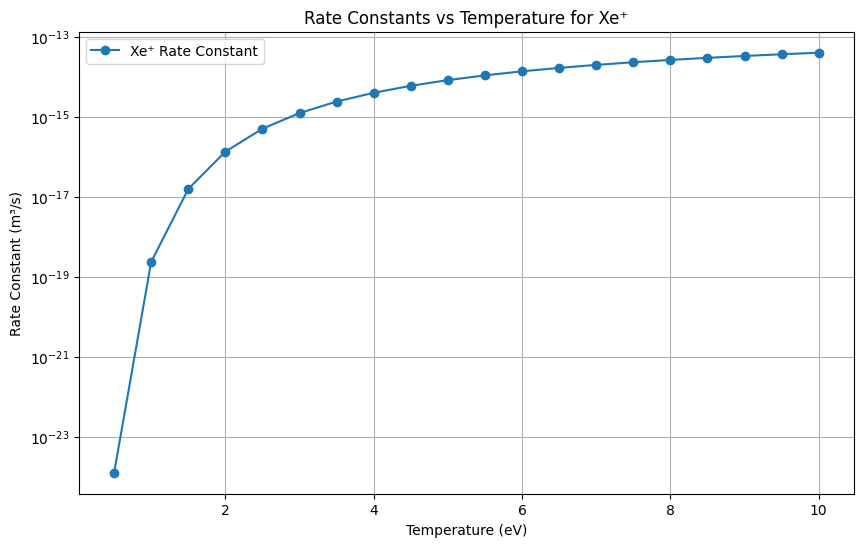

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Xe+'].dropna().values  # Speeds (v) in m/s
y1 = df['Xe+'].dropna().values        # Cross-section in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a spline interpolation of the integrand
    # s=0 forces the spline to pass through all points
    integrand_spline = UnivariateSpline(x1_sorted, integrand_values, s=0, ext='zeros')
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_spline(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Xe⁺ Rate Constant')
plt.title('Rate Constants vs Temperature for Xe⁺')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


T (eV): 0.50, Rate Constant: 2.8487e-48 m³/s
T (eV): 1.00, Rate Constant: 3.8625e-31 m³/s
T (eV): 1.50, Rate Constant: 1.8914e-25 m³/s
T (eV): 2.00, Rate Constant: 1.4349e-22 m³/s
T (eV): 2.50, Rate Constant: 8.0782e-21 m³/s
T (eV): 3.00, Rate Constant: 1.2121e-19 m³/s
T (eV): 3.50, Rate Constant: 8.4628e-19 m³/s
T (eV): 4.00, Rate Constant: 3.6497e-18 m³/s
T (eV): 4.50, Rate Constant: 1.1402e-17 m³/s
T (eV): 5.00, Rate Constant: 2.8413e-17 m³/s
T (eV): 5.50, Rate Constant: 6.0057e-17 m³/s
T (eV): 6.00, Rate Constant: 1.1219e-16 m³/s
T (eV): 6.50, Rate Constant: 1.9058e-16 m³/s
T (eV): 7.00, Rate Constant: 3.0042e-16 m³/s
T (eV): 7.50, Rate Constant: 4.4608e-16 m³/s
T (eV): 8.00, Rate Constant: 6.3094e-16 m³/s
T (eV): 8.50, Rate Constant: 8.5737e-16 m³/s
T (eV): 9.00, Rate Constant: 1.1268e-15 m³/s
T (eV): 9.50, Rate Constant: 1.4399e-15 m³/s
T (eV): 10.00, Rate Constant: 1.7965e-15 m³/s


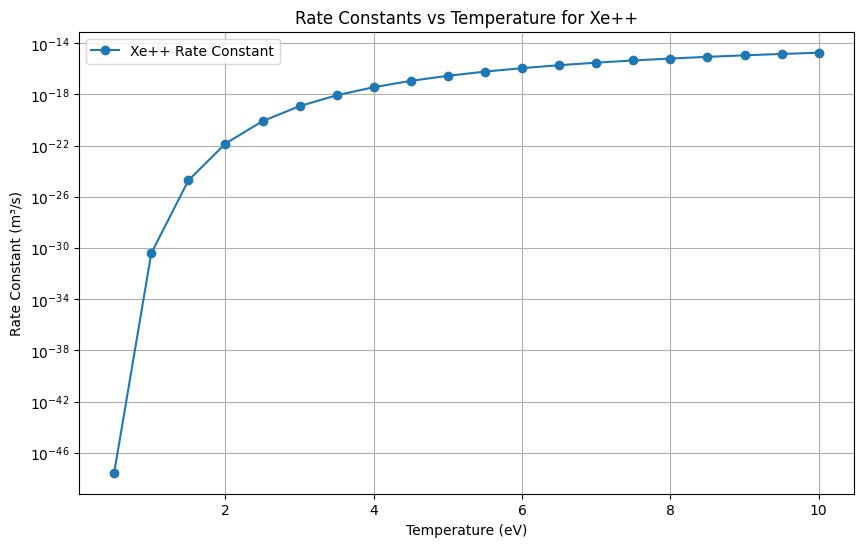

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Xe++'].dropna().values  # Speeds (v) in m/s
y1 = df['Xe++'].dropna().values        # Cross-section in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a spline interpolation of the integrand
    # s=0 forces the spline to pass through all points
    integrand_spline = UnivariateSpline(x1_sorted, integrand_values, s=0, ext='zeros')
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_spline(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Xe++ Rate Constant')
plt.title('Rate Constants vs Temperature for Xe++')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
#plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()


T (eV): 0.50, Rate Constant: 3.2155e-22 m³/s
T (eV): 1.00, Rate Constant: 2.4777e-18 m³/s
T (eV): 1.50, Rate Constant: 6.6904e-17 m³/s
T (eV): 2.00, Rate Constant: 3.9413e-16 m³/s
T (eV): 2.50, Rate Constant: 1.2039e-15 m³/s
T (eV): 3.00, Rate Constant: 2.5965e-15 m³/s
T (eV): 3.50, Rate Constant: 4.5497e-15 m³/s
T (eV): 4.00, Rate Constant: 6.9713e-15 m³/s
T (eV): 4.50, Rate Constant: 9.7449e-15 m³/s
T (eV): 5.00, Rate Constant: 1.2757e-14 m³/s
T (eV): 5.50, Rate Constant: 1.5909e-14 m³/s
T (eV): 6.00, Rate Constant: 1.9122e-14 m³/s
T (eV): 6.50, Rate Constant: 2.2334e-14 m³/s
T (eV): 7.00, Rate Constant: 2.5500e-14 m³/s
T (eV): 7.50, Rate Constant: 2.8587e-14 m³/s
T (eV): 8.00, Rate Constant: 3.1573e-14 m³/s
T (eV): 8.50, Rate Constant: 3.4443e-14 m³/s
T (eV): 9.00, Rate Constant: 3.7188e-14 m³/s
T (eV): 9.50, Rate Constant: 3.9804e-14 m³/s
T (eV): 10.00, Rate Constant: 4.2291e-14 m³/s


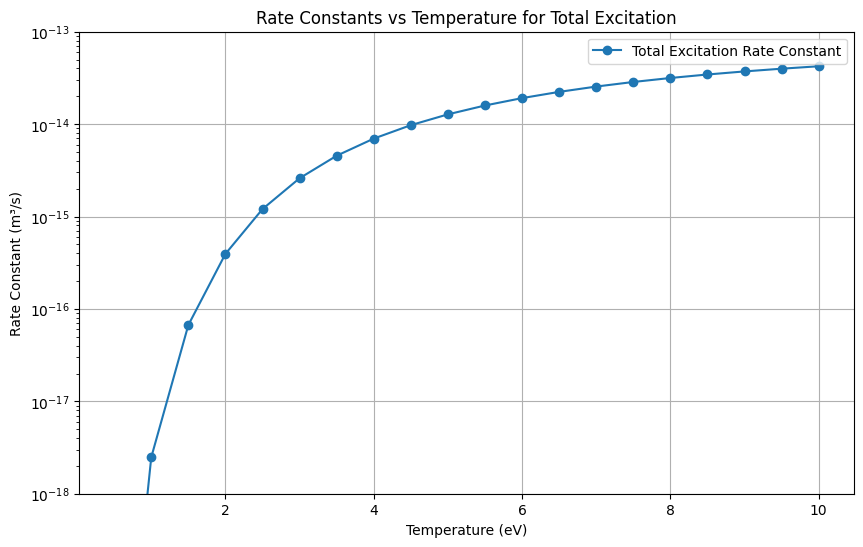

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Total Excitation'].dropna().values  # Speeds (v) in m/s
y1 = df['Total Excitation'].dropna().values        # Cross-section in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a spline interpolation of the integrand
    # s=0 forces the spline to pass through all points
    integrand_spline = UnivariateSpline(x1_sorted, integrand_values, s=0, ext='zeros')
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_spline(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Total Excitation Rate Constant')
plt.title('Rate Constants vs Temperature for Total Excitation')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()


T (eV): 0.50, Rate Constant: 2.0722e-14 m³/s
T (eV): 1.00, Rate Constant: 5.9362e-14 m³/s
T (eV): 1.50, Rate Constant: 1.1021e-13 m³/s
T (eV): 2.00, Rate Constant: 1.5501e-13 m³/s
T (eV): 2.50, Rate Constant: 1.8967e-13 m³/s
T (eV): 3.00, Rate Constant: 2.1496e-13 m³/s
T (eV): 3.50, Rate Constant: 2.3278e-13 m³/s
T (eV): 4.00, Rate Constant: 2.4498e-13 m³/s
T (eV): 4.50, Rate Constant: 2.5304e-13 m³/s
T (eV): 5.00, Rate Constant: 2.5810e-13 m³/s
T (eV): 5.50, Rate Constant: 2.6098e-13 m³/s
T (eV): 6.00, Rate Constant: 2.6227e-13 m³/s
T (eV): 6.50, Rate Constant: 2.6244e-13 m³/s
T (eV): 7.00, Rate Constant: 2.6178e-13 m³/s
T (eV): 7.50, Rate Constant: 2.6053e-13 m³/s
T (eV): 8.00, Rate Constant: 2.5888e-13 m³/s
T (eV): 8.50, Rate Constant: 2.5693e-13 m³/s
T (eV): 9.00, Rate Constant: 2.5479e-13 m³/s
T (eV): 9.50, Rate Constant: 2.5253e-13 m³/s
T (eV): 10.00, Rate Constant: 2.5020e-13 m³/s


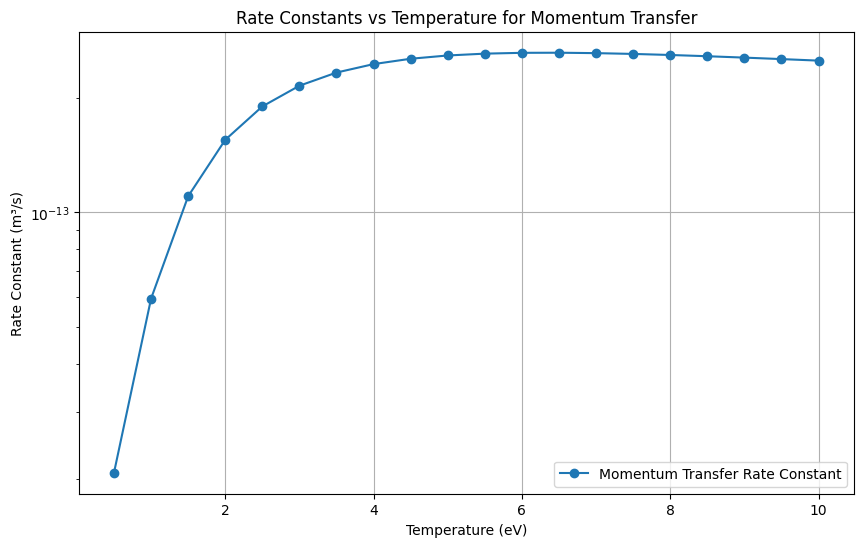

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Momentum Transfer'].dropna().values  # Speeds (v) in m/s
y1 = df['Momentum Transfer'].dropna().values        # Cross-section in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a spline interpolation of the integrand
    # s=0 forces the spline to pass through all points
    integrand_spline = UnivariateSpline(x1_sorted, integrand_values, s=0, ext='zeros')
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_spline(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Momentum Transfer Rate Constant')
plt.title('Rate Constants vs Temperature for Momentum Transfer')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\khoi2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_cubic.py:313: RuntimeWarning: overflow encountered in divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


T (eV): 0.50, Rate Constant: 1.3368e-24 m³/s
T (eV): 1.00, Rate Constant: 2.3368e-19 m³/s
T (eV): 1.50, Rate Constant: 1.5513e-17 m³/s
T (eV): 2.00, Rate Constant: 1.3394e-16 m³/s
T (eV): 2.50, Rate Constant: 5.0356e-16 m³/s
T (eV): 3.00, Rate Constant: 1.2436e-15 m³/s
T (eV): 3.50, Rate Constant: 2.4083e-15 m³/s
T (eV): 4.00, Rate Constant: 3.9966e-15 m³/s
T (eV): 4.50, Rate Constant: 5.9744e-15 m³/s
T (eV): 5.00, Rate Constant: 8.2922e-15 m³/s
T (eV): 5.50, Rate Constant: 1.0895e-14 m³/s
T (eV): 6.00, Rate Constant: 1.3729e-14 m³/s
T (eV): 6.50, Rate Constant: 1.6745e-14 m³/s
T (eV): 7.00, Rate Constant: 1.9902e-14 m³/s
T (eV): 7.50, Rate Constant: 2.3161e-14 m³/s
T (eV): 8.00, Rate Constant: 2.6492e-14 m³/s
T (eV): 8.50, Rate Constant: 2.9870e-14 m³/s
T (eV): 9.00, Rate Constant: 3.3271e-14 m³/s
T (eV): 9.50, Rate Constant: 3.6680e-14 m³/s
T (eV): 10.00, Rate Constant: 4.0082e-14 m³/s


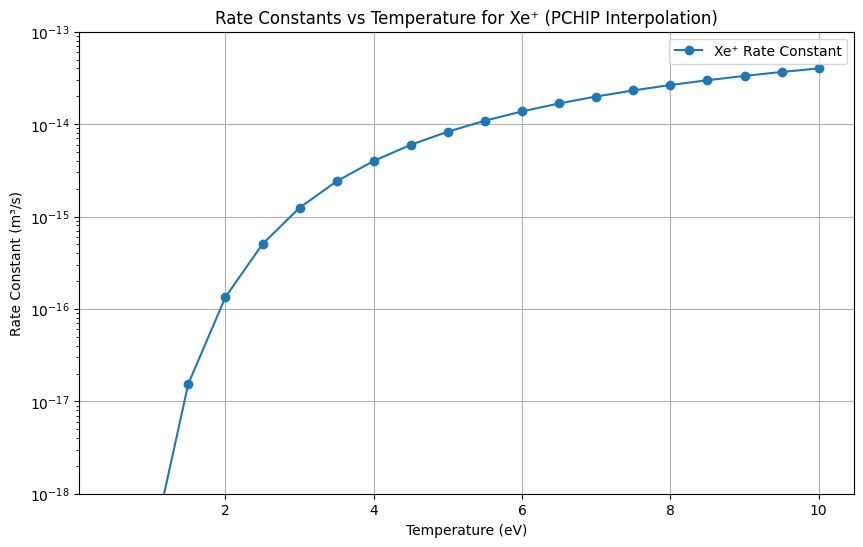

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import PchipInterpolator

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Xe+'].dropna().values  # Speeds (v) in m/s
y1 = df['Xe+'].dropna().values        # Cross-section in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a PCHIP interpolation of the integrand
    integrand_pchip = PchipInterpolator(x1_sorted, integrand_values, extrapolate=False)
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_pchip(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Xe⁺ Rate Constant')
plt.title('Rate Constants vs Temperature for Xe⁺ (PCHIP Interpolation)')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()


C:\Users\khoi2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_cubic.py:313: RuntimeWarning: overflow encountered in divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


T (eV): 0.50, Rate Constant: 3.0137e-48 m³/s
T (eV): 1.00, Rate Constant: 4.0849e-31 m³/s
T (eV): 1.50, Rate Constant: 1.9557e-25 m³/s
T (eV): 2.00, Rate Constant: 1.4807e-22 m³/s
T (eV): 2.50, Rate Constant: 8.2498e-21 m³/s
T (eV): 3.00, Rate Constant: 1.2263e-19 m³/s
T (eV): 3.50, Rate Constant: 8.5037e-19 m³/s
T (eV): 4.00, Rate Constant: 3.6493e-18 m³/s
T (eV): 4.50, Rate Constant: 1.1297e-17 m³/s
T (eV): 5.00, Rate Constant: 2.8272e-17 m³/s
T (eV): 5.50, Rate Constant: 5.9896e-17 m³/s
T (eV): 6.00, Rate Constant: 1.1194e-16 m³/s
T (eV): 6.50, Rate Constant: 1.9027e-16 m³/s
T (eV): 7.00, Rate Constant: 3.0016e-16 m³/s
T (eV): 7.50, Rate Constant: 4.4606e-16 m³/s
T (eV): 8.00, Rate Constant: 6.3144e-16 m³/s
T (eV): 8.50, Rate Constant: 8.5885e-16 m³/s
T (eV): 9.00, Rate Constant: 1.1299e-15 m³/s
T (eV): 9.50, Rate Constant: 1.4436e-15 m³/s
T (eV): 10.00, Rate Constant: 1.7992e-15 m³/s


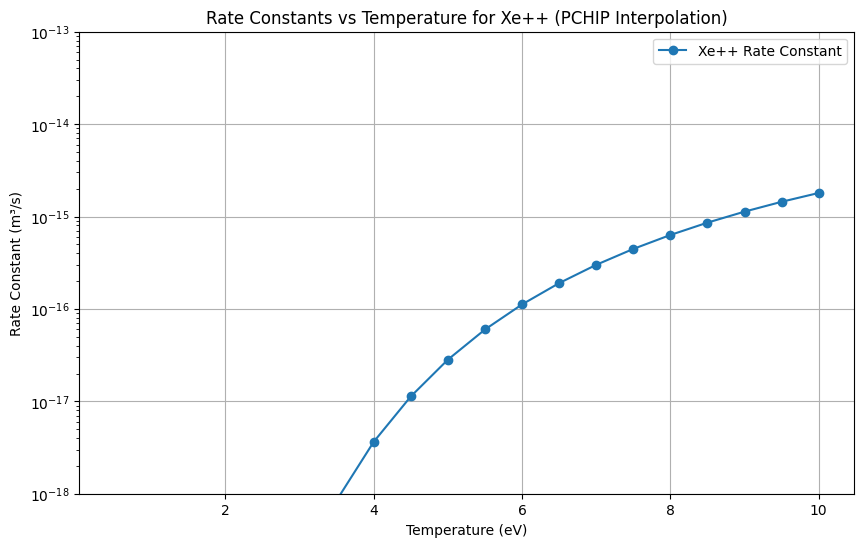

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import PchipInterpolator

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Xe++'].dropna().values  # Speeds (v) in m/s
y1 = df['Xe++'].dropna().values        # Cross-section in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a PCHIP interpolation of the integrand
    integrand_pchip = PchipInterpolator(x1_sorted, integrand_values, extrapolate=False)
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_pchip(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Xe++ Rate Constant')
plt.title('Rate Constants vs Temperature for Xe++ (PCHIP Interpolation)')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()


T (eV): 0.50, Rate Constant: 3.1725e-22 m³/s
T (eV): 1.00, Rate Constant: 2.4755e-18 m³/s
T (eV): 1.50, Rate Constant: 6.7064e-17 m³/s
T (eV): 2.00, Rate Constant: 3.9571e-16 m³/s
T (eV): 2.50, Rate Constant: 1.2080e-15 m³/s
T (eV): 3.00, Rate Constant: 2.6060e-15 m³/s
T (eV): 3.50, Rate Constant: 4.5670e-15 m³/s


C:\Users\khoi2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_cubic.py:313: RuntimeWarning: overflow encountered in divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


T (eV): 4.00, Rate Constant: 6.9953e-15 m³/s
T (eV): 4.50, Rate Constant: 9.7714e-15 m³/s
T (eV): 5.00, Rate Constant: 1.2794e-14 m³/s
T (eV): 5.50, Rate Constant: 1.5955e-14 m³/s
T (eV): 6.00, Rate Constant: 1.9178e-14 m³/s
T (eV): 6.50, Rate Constant: 2.2400e-14 m³/s
T (eV): 7.00, Rate Constant: 2.5579e-14 m³/s
T (eV): 7.50, Rate Constant: 2.8683e-14 m³/s
T (eV): 8.00, Rate Constant: 3.1660e-14 m³/s
T (eV): 8.50, Rate Constant: 3.4511e-14 m³/s
T (eV): 9.00, Rate Constant: 3.7239e-14 m³/s
T (eV): 9.50, Rate Constant: 3.9838e-14 m³/s
T (eV): 10.00, Rate Constant: 4.2310e-14 m³/s


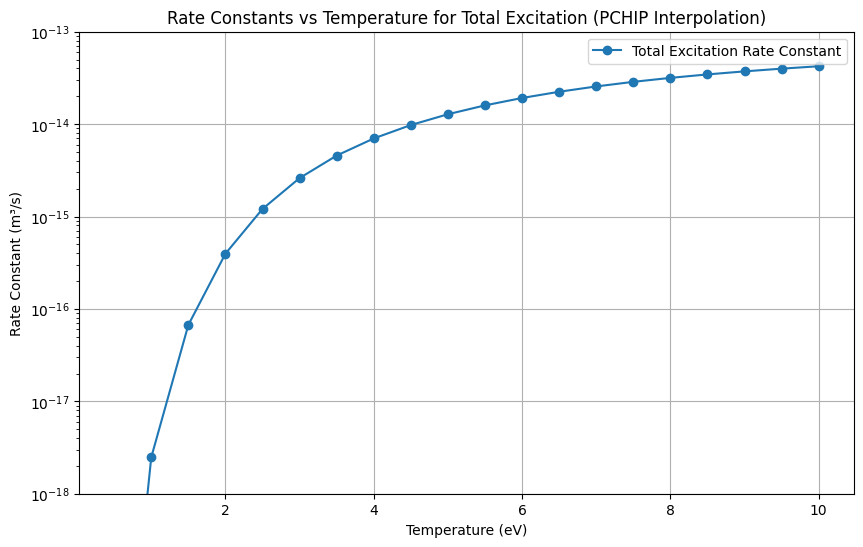

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import PchipInterpolator

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Total Excitation'].dropna().values  # Speeds (v) in m/s
y1 = df['Total Excitation'].dropna().values        # Cross-section σ(v) in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a PCHIP interpolation of the integrand
    integrand_pchip = PchipInterpolator(x1_sorted, integrand_values, extrapolate=False)
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_pchip(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Total Excitation Rate Constant')
plt.title('Rate Constants vs Temperature for Total Excitation (PCHIP Interpolation)')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()


T (eV): 0.50, Rate Constant: 2.0747e-14 m³/s
T (eV): 1.00, Rate Constant: 5.9359e-14 m³/s
T (eV): 1.50, Rate Constant: 1.1015e-13 m³/s
T (eV): 2.00, Rate Constant: 1.5508e-13 m³/s
T (eV): 2.50, Rate Constant: 1.8979e-13 m³/s
T (eV): 3.00, Rate Constant: 2.1515e-13 m³/s


C:\Users\khoi2\AppData\Local\Temp\ipykernel_38772\3587880877.py:46: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
C:\Users\khoi2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_cubic.py:313: RuntimeWarning: overflow encountered in divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


T (eV): 3.50, Rate Constant: 2.3306e-13 m³/s
T (eV): 4.00, Rate Constant: 2.4517e-13 m³/s
T (eV): 4.50, Rate Constant: 2.5302e-13 m³/s
T (eV): 5.00, Rate Constant: 2.5791e-13 m³/s
T (eV): 5.50, Rate Constant: 2.6065e-13 m³/s
T (eV): 6.00, Rate Constant: 2.6200e-13 m³/s
T (eV): 6.50, Rate Constant: 2.6224e-13 m³/s
T (eV): 7.00, Rate Constant: 2.6164e-13 m³/s
T (eV): 7.50, Rate Constant: 2.6044e-13 m³/s
T (eV): 8.00, Rate Constant: 2.5881e-13 m³/s
T (eV): 8.50, Rate Constant: 2.5689e-13 m³/s
T (eV): 9.00, Rate Constant: 2.5477e-13 m³/s
T (eV): 9.50, Rate Constant: 2.5253e-13 m³/s
T (eV): 10.00, Rate Constant: 2.5021e-13 m³/s


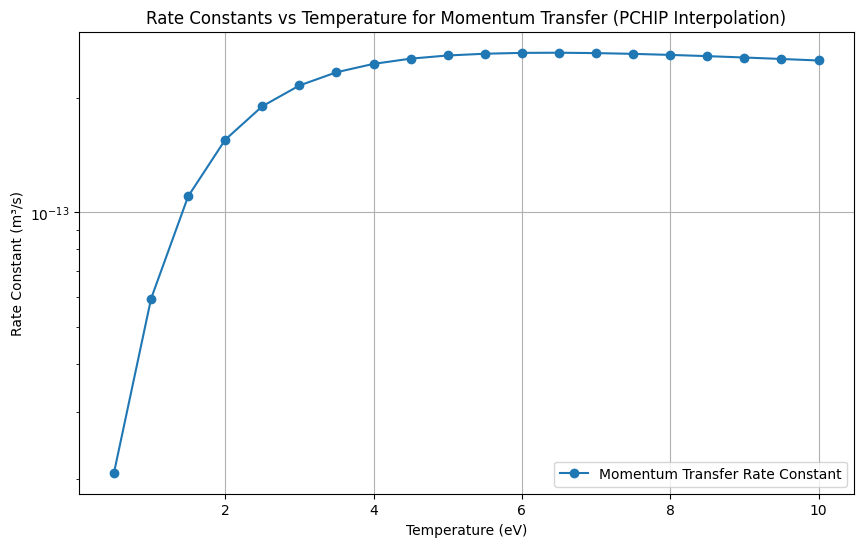

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import PchipInterpolator

# Load data
df = pd.read_excel('c:/Users/khoi2/Documents/UIUC Docs/Cross Section Redo.xlsx', sheet_name='Xenon')

# Extract columns for Xe+ and Total Excitation
x1 = df['Speed Momentum Transfer'].dropna().values  # Speeds (v) in m/s
y1 = df['Momentum Transfer'].dropna().values        # Cross-section σ(v) in m²

# Constants
m_e = 9.10938356e-31  # Electron mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]

# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = -m_e * x1_sorted**2 / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a PCHIP interpolation of the integrand
    integrand_pchip = PchipInterpolator(x1_sorted, integrand_values, extrapolate=False)
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_pchip(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Momentum Transfer Rate Constant')
plt.title('Rate Constants vs Temperature for Momentum Transfer (PCHIP Interpolation)')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
#plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()
